# Algebra Lineal

In [2]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg # Biblioteca para algebra lineal

Populating the interactive namespace from numpy and matplotlib


## Algebra de matrices

Los arreglos de **numpy** no se comportan como las _matrices_ de sus clases de algebra lineal.

En lugar de ello, hacen _broadcasting_, como hemos visto en las clases pasadas. Recordemos que _broadcasting_ es mapear las operaciones a cada uno de los elementos del arreglo (_array_).

¿Pero que pasa si queremos hacer operaciones matriciales? Bueno, **numpy** nos ofrece las siguientes opciones.

Definamos el arreglo $\textbf{A}$

In [3]:
A = array([[n+m*10 for n in range(1,5)] for m in range(1,5)])

A

array([[11, 12, 13, 14],
       [21, 22, 23, 24],
       [31, 32, 33, 34],
       [41, 42, 43, 44]])

El arreglo $\textbf{A}$, es eso, un arreglo (_array_), es el mismo objeto que hemos visto con anterioridad. **Numpy** soporta (en beneficio de los usuarios de `matlab`/`GNU Octave`) el objeto `matrix`.

In [4]:
Am = np.matrix(A)
Am

matrix([[11, 12, 13, 14],
        [21, 22, 23, 24],
        [31, 32, 33, 34],
        [41, 42, 43, 44]])

<div class="alert alert-warning">
Como probablemente en un futuro se topen con cosas de `matlab / GNU Octave` les recomiendo esta [liga](http://wiki.scipy.org/NumPy_for_Matlab_Users)
</div>

Nada nuevo en cuanto las dimensiones de $\textbf{A}$ y $A_m$:

In [5]:
print(A.shape)
print(Am.shape)

(4, 4)
(4, 4)


Pero recordemos de la clase pasada que el _slicing_ devuelve arreglos unidimensionales 

In [6]:
y = A[:, 0]
print(y)
print(y.shape)

[11 21 31 41]
(4,)


En lugar de arreglos bidimensionales (Recuerden sus clases de algebra lineal y piensen en lo que llaman _vectores_...)

In [7]:
ym = Am[:,0]
print(ym)
print(ym.shape)

[[11]
 [21]
 [31]
 [41]]
(4, 1)


Obviamente este comportamiento se puede simular con arreglos y _slicing_, pero es más elaborado:

In [8]:
y = A[:,:1]
print(y)
print(y.shape)

[[11]
 [21]
 [31]
 [41]]
(4, 1)


Las operaciones en matrices (usando la clase `matrix`) son como sigue:

In [9]:
Am*ym

matrix([[1350],
        [2390],
        [3430],
        [4470]])

In [ ]:
ym*Am

<div class="alert alert-info">
**Ejercicio** ¿Por qué no funcionó?
</div>

In [10]:
ym.T

matrix([[11, 21, 31, 41]])

In [11]:
Am.T

matrix([[11, 21, 31, 41],
        [12, 22, 32, 42],
        [13, 23, 33, 43],
        [14, 24, 34, 44]])

Una operación común es el producto $y^T A y$ (esto es simplemente el _producto interno_)

In [12]:
ym.T*Am*ym

matrix([[354640]])

In [13]:
Am*Am

matrix([[1350, 1400, 1450, 1500],
        [2390, 2480, 2570, 2660],
        [3430, 3560, 3690, 3820],
        [4470, 4640, 4810, 4980]])

In [14]:
Am**2 # Esto es equivalente a Am * Am

matrix([[1350, 1400, 1450, 1500],
        [2390, 2480, 2570, 2660],
        [3430, 3560, 3690, 3820],
        [4470, 4640, 4810, 4980]])

In [15]:
Am + ym

matrix([[22, 23, 24, 25],
        [42, 43, 44, 45],
        [62, 63, 64, 65],
        [82, 83, 84, 85]])

In [16]:
Am**(-1)

matrix([[ 5.62174540e+14, -5.74581151e+14, -5.37361319e+14,
          5.49767930e+14],
        [-1.12861385e+15,  1.08519072e+15,  1.21546013e+15,
         -1.17203699e+15],
        [ 5.70704085e+14, -4.46637980e+14, -8.18836296e+14,
          6.94770190e+14],
        [-4.26477237e+12, -6.39715856e+13,  1.40737488e+14,
         -7.25011304e+13]])

In [17]:
Id = matrix(np.identity(4))
Id

matrix([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])

### Soluciones de sistemas de ecuaciones

Los sistemas de ecuaciones lineales se pueden plantear como un problema matricial, del tipo $\textbf{A}\textbf{x} = \textbf{B}$, por ejemplo:

$3x + 6y -5z = 12$

$x - 3y + 2z = -2$

$5x -y + 4z = 10$

La solución de las ecuaciones matriciales $\textbf{A}\textbf{x} = \textbf{B}$, es $\textbf{x} = \textbf{A}^{-1}\textbf{B}$ (Si la matriz $\textbf{A}$ es invertible, claro está)

In [2]:
A = np.matrix([[3,6,-5],
              [1,-3,2],
              [5,-1,4]])

NameError: name 'np' is not defined

In [19]:
B = np.matrix([[12],
               [-2],
               [10]])
B

matrix([[12],
        [-2],
        [10]])

In [20]:
x = A**(-1)*B
print(x)

[[1.75]
 [1.75]
 [0.75]]


In [21]:
A*x

matrix([[12.],
        [-2.],
        [10.]])

<div class="alert alert-danger">
Es importante tener en mente que las matrices generalmente no son invertibles, por lo que este método de solución, no siempre funciona. 
</div>

<div class="alert alert-danger">
El invertir matrices es un proceso largo y pesado que además puede ser demasiado cálculo para lo que se requiere. 
</div>

### Transformaciones

In [22]:
A = np.matrix("1,2,3;4,5,6")
A

matrix([[1, 2, 3],
        [4, 5, 6]])

In [23]:
C = matrix([[1j, 2j], [3j, 4j]])
C

matrix([[0.+1.j, 0.+2.j],
        [0.+3.j, 0.+4.j]])

El conjugado de una matriz compleja $\textbf{C}$

In [24]:
conjugate(C)

matrix([[0.-1.j, 0.-2.j],
        [0.-3.j, 0.-4.j]])

El _hermitianno_ de una matriz (es decir, el _conjugado_ y la _traspuesta_)

In [25]:
C.H

matrix([[0.-1.j, 0.-3.j],
        [0.-2.j, 0.-4.j]])

In [26]:
(conjugate(C)).T

matrix([[0.-1.j, 0.-3.j],
        [0.-2.j, 0.-4.j]])

El _hermitiano_ de una matriz real (como $\textbf{A}$) es simplemente la _traspuesta_

In [27]:
print( A.H )
print (A.T)

[[1 4]
 [2 5]
 [3 6]]
[[1 4]
 [2 5]
 [3 6]]


La parte $\Re$ e $\Im$ de una matriz es

In [28]:
real(C) # también funciona C.real

matrix([[0., 0.],
        [0., 0.]])

In [29]:
imag(C) # también funciona C.imag

matrix([[1., 2.],
        [3., 4.]])

In [30]:
A.imag

matrix([[0, 0, 0],
        [0, 0, 0]])

La inversa de una matriz

In [31]:
inv(C)

matrix([[0.+2.j , 0.-1.j ],
        [0.-1.5j, 0.+0.5j]])

In [32]:
C.I

matrix([[0.+2.j , 0.-1.j ],
        [0.-1.5j, 0.+0.5j]])

In [33]:
C*C.I

matrix([[1.0000000e+00+0.j, 0.0000000e+00+0.j],
        [8.8817842e-16+0.j, 1.0000000e+00+0.j]])

In [34]:
inv(C)*C

matrix([[1.00000000e+00+0.j, 0.00000000e+00+0.j],
        [2.22044605e-16+0.j, 1.00000000e+00+0.j]])

### Determinantes

In [35]:
A = np.matrix([[1,2],[3,4]])
A

matrix([[1, 2],
        [3, 4]])

In [38]:
np.linalg.det(A)

17.999999999999996

In [39]:
B = np.arange(1,10).reshape(3,3)
B = np.matrix(B)
B

matrix([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [40]:
np.linalg.det(B)

6.66133814775094e-16

<div class="alert alert-info">
Sean las matrices $\textbf{A}$ y $\textbf{B}$ definidas abajo, compruebe las propiedades $1-6$ de los determinantes como se muestran en la página de la [Wikipedia](http://en.wikipedia.org/wiki/Determinant)
</div>

In [37]:
A = np.matrix([[-2,2,-3],
               [-1,1,3],
               [2,0,-1]])
print(A)

[[-2  2 -3]
 [-1  1  3]
 [ 2  0 -1]]


In [36]:
B = np.matrix([[5, -3, 2],
               [1,0,2],
               [2,-1,3]])
print(B)

[[ 5 -3  2]
 [ 1  0  2]
 [ 2 -1  3]]


In [48]:
np.linalg.det(Id)

1.0

In [49]:
np.linalg.det(A.T)

18.000000000000004

In [50]:
np.linalg.det(A)

17.999999999999996

In [51]:
det(inv(A))

0.055555555555555566

In [52]:
det(A**-1)

0.055555555555555566

In [59]:
det(A*B)

3.4638958368304884e-14

In [58]:
det(A)*det(B)

1.199040866595169e-14

In [61]:
det(5*A)

2250.0000000000005

In [63]:
5**3*det(A)

2249.9999999999995

<div class="alert alert-info">
**Ejercicio**: Resuelva el sistema de ecuaciones lineales mostrado anteriormente, pero usando la [**Regla de Cramer**](http://en.wikipedia.org/wiki/Cramer's_rule)
</div>

El módulo `scipy.linalg` permite la creación de matrices especiales, tales como matrices diagonales de bloques `block_diag`, matrices circulantes `circulant`, matrices _companion_ (`companion`), matrices de Hadamard (`hadamard`), Hankel (`hankel`), Hilbert (`hilbert`), Hilbert invertida (`invhilbert`), Leslie (`leslie`), Toeplitz (`toeplitz`) y matrices triangulares (`tri`, `tril`, `triu`).

### Eigenvalores y eigenvectores

El cálculo de _eigenvectores_ y _eigenvalores_ es uno de los más complicados (y útiles) a realizarse en matrices cuadradas. **SciPy** posee varias rutinas para calcularlas:

- `eigvals`

- `eigvalsh`

- `eigvals_banded`

Y los respectivos métodos para _eigenvectores_: `eig`, `eigh` y `eigh_banded`.

<div class="alert alert-info">
**Ejercicio:** Calcule los _eigenvectores_ e _eigenvalores_ de las siguientes matrices usando los diferentes métodos.

- $$ A =  \left[\begin{matrix} 4 & 6 & 4\\-2 & -3 & -4\\0 & 0 & 2\end{matrix}\right] $$

- $$ B = \left[\begin{matrix} 1 & 2 & 0\\0 & 1 & 2\\0 & 0 & 1\end{matrix}\right] $$

**NOTA** Si es posible, utilice los métodos de creación de matrices especiales.

</div>

### Algebra lineal simbólica

Es posible manipular algebraicamente a matrices de expresiones simbólicas, usando la clase de `Matrix` de **SimPy** . 

In [ ]:
from ipywidgets import interact
from IPython.display import display

<div class="alert alert-danger">
Cuando se trabaja con **Sympy** **no** se puede usar  `%pylab inline` ya que `%pylab%` importa variables que entraran en conflicto con **Sympy**. Es mejor usar, `%matplotlib inline` e importar `numpy` y `matplotlib`.
</div>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sympy import *

In [ ]:
init_printing(use_latex='mathjax')

In [ ]:
x = Symbol('x')
y = Symbol('y')


In [ ]:
A = Matrix([[1,x], [y,1]])
A

In [ ]:
A[0,0]

In [ ]:
A[:,1]

In [ ]:
A**2

In [ ]:
A.inv()

In [ ]:
I = A.inv()*A
I

In [ ]:
I = simplify(I)
I

Para matrices pequeñas, puedes calcular los _eigenvalores_ simbólicamente.

In [ ]:
A.eigenvals()

In [ ]:
A.subs({x:0, y:1})

<div class="alert alert-info">
**Ejercicio**: Cree matrices de $3\times3$ de *Hilbert*, *Leslie* y *Circulantes* y muéstrelas de manera simbólica.
</div>

## Ejemplos

### Procesamiento de imágenes

Vamos a representar las imágenes como matrices $\mathbf{R}^{n\ \times\  m\  \times\  k}$. Usaremos primero el método decomposición de matrices conocido como [*Single Value Decomposition*](http://en.wikipedia.org/wiki/Singular_value_decomposition) (**SVD**) para reducir el tamaño de la imagen.

La **SVD** de una matriz (real o compleja) $\textbf{M}$ de $m \times n$ es una factorización de la forma $\textbf{M} = U\cdot S \cdot V^*$, en la cual $U$ es matriz $m \times m$ unitaria, $S$ es una matriz $m \times n$ rectangular diagonal con elementos no-negativos, y $V^*$ es la conjugada traspuesta de una matriz unitaria de $n \times n$.

A los elementos de la diagonal $S_{ii}$ of $S$ se les denomina valores singulares de $\textbf{M}$. A las $m$ columnas de $U$ y a las $n$ de $V$ se les llama vectores singulares izquierdos o derechos, respectivamente.

 
Cuando $\textbf{M}$ es cuadrada ( $m \times m$) y  real con determinante positivo, $U$, $V^*$, y $S$ son matrices reales de $m \times m$, entonces $S$ puede ser interpretada como una matriz de escalamiento, y  U$, $V^*$ como matrices de rotación.

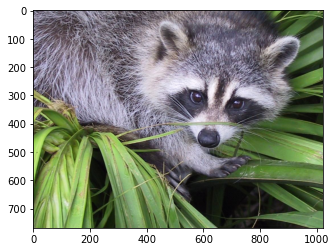

In [64]:
import scipy.misc
img = scipy.misc.face()
plt.imshow(img)

In [65]:
img

array([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165],
        ...,
        [119, 126,  74],
        [131, 136,  82],
        [139, 144,  90]],

       [[ 89,  82, 100],
        [110, 103, 121],
        [130, 122, 143],
        ...,
        [118, 125,  71],
        [134, 141,  87],
        [146, 153,  99]],

       [[ 73,  66,  84],
        [ 94,  87, 105],
        [115, 108, 126],
        ...,
        [117, 126,  71],
        [133, 142,  87],
        [144, 153,  98]],

       ...,

       [[ 87, 106,  76],
        [ 94, 110,  81],
        [107, 124,  92],
        ...,
        [120, 158,  97],
        [119, 157,  96],
        [119, 158,  95]],

       [[ 85, 101,  72],
        [ 95, 111,  82],
        [112, 127,  96],
        ...,
        [121, 157,  96],
        [120, 156,  94],
        [120, 156,  94]],

       [[ 85, 101,  74],
        [ 97, 113,  84],
        [111, 126,  97],
        ...,
        [120, 156,  95],
        [119, 155,  93],
        [118, 154,  92]]

In [66]:
shape(img)

(768, 1024, 3)

In [67]:
U, S, Vs = scipy.linalg.svd(img[:,:,2])
print(U.shape)
print(S.shape)
print(Vs.shape)

(768, 768)
(768,)
(1024, 1024)


La matriz $S$ está representada como una matriz _sparse_. Como queremos hacer una compresión de la imagen, sólo nos quedaremos con $32$ de los _valores singulares_. Creamos una nueva matriz cuyos elementos están dados por la siguiente fórmula:

$$ \Sigma^k_{j = 1} \quad s_j(u_j \cdot v_j) $$


donde, $s$ son los valores singulares, $u$ y $v$ son los vectores singulares.

In [68]:
A = numpy.dot( U[:, 0:32], numpy.dot(numpy.diag(S[0:32]), Vs[0:32,:]))

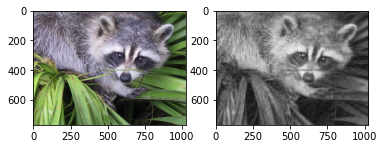

In [69]:
plt.subplot(121, aspect='equal'); plt.imshow(img);
plt.gray()

plt.subplot(122, aspect='equal'); plt.imshow(A);

### Autómatas Celulares

Un [autómata celular](http://en.wikipedia.org/wiki/Cellular_automaton) (**CA**) es un modelo del mundo con física simple. Se les conoce como _autómatas celulares_ ya que el espacio está dividido en pedazos discretos, llamados _celdas_ (de ahí "celular") y a que computa (i.e. es un "autómata").

Los **CA** están gobernados por _reglas_ (la física) que determina como evoluciona el sistema en el tiempo. El tiempo también está dividido en pasos (_steps_) dicretos, y la regla especifica como cambia el estado actual del "mundo" en el tiempo $t+1$ basado en el tiempo actual $t$.

Los **CA** fueron estudiados extensivamente a principios de los 80s por **Stephen Wolfram** (Sí, el de `Mathematica`). En particular el estudio **CA**s unidimensionales, llamadas _autómatas celulares elementales_.

Un _autómata celular elemental_ es un **CA** 1D en la cual cada celda tiene dos posibles estados, y en la cual la regla tiene como entradas el estado actual de la celda y el estado de sus vecinos inmediatos (que son dos en 1D). Existen, entonces $2^3 = 8$ posibles patrones de tres celdas (_vecindad_) y $2^8 = 256$ reglas posibles.

Por ejemplo:

| Estado |  | | | | | | | |
|:---|:-------------:|:-----------:|:------:|:------:|:--:|:--:|:--:|:--:|
| Actual | 111 | 110 | 101 | 100 | 011 | 010 | 001 | 000|
| Siguiente | 0 |0 | 1 | 1 | 0 | 0 | 1 | 0 |

Wolfram sugirió nombrar las reglas usando el renglón inferior como binario. En el caso recién mostrado, es la **Regla 50**.

![Rule30](https://upload.wikimedia.org/wikipedia/commons/e/e2/One-d-cellular-automate-rule-30.gif "ca")


El siguiente código está basado en el trabajo de Allen B. Downey. Representa un autómata celular.

In [70]:
import numpy as np

# Basado en el código de Allen B. Downey


class CA(object):
    """Representa un autómata celular 1D.
    
    Los parámetros del constructor son:

    rule:  Un entero del 0-255.
    n:      Número de renglones (timesteps).
    ratio:  Razón de los renglones a las columnas
    """

    def __init__(self, rule, n=100, ratio=2):
        """
        Atributos:
        table:  Diccionario que mapea el estado, al siguiente.
        n, m:   Renglones, columnas.
        array:  Arreglo que contiene los datos.
        next:   Índice del siguiente estado.
        """
        self.table = self.make_table(rule)
        self.n = n
        self.m = ratio*n + 1
        self.array = np.zeros((n, self.m), dtype=np.int8)
        self.next = 0

    def make_table(self, rule):
        """Regresa la tabla con las reglas del CA 
        (Implementada como un diccionario).
        """
        table = {}
        for i, bit in enumerate(binary(rule, 8)):
            t = binary(7-i, 3)
            table[t] = bit
        return table
    
    def start_single(self):
        """La semilla es una sola y aparece a la mitad del arreglo 1D."""
        self.array[0, int(self.m/2)] = 1
        self.next += 1

    def start_random(self):
        """Valores aleatorios en el tiempo t_0"""
        self.array[0] = np.random.random([1,self.m]).round()
        self.next += 1

    def loop(self, steps=1):
        """Ejecuta el número especificado de pasos."""
        [self.step() for i in range(steps)]

    def step(self):
        """Avanza un paso t -> t+1."""
        i = self.next
        self.next += 1

        a = self.array
        t = self.table
        for j in range(1,self.m-1):
            a[i,j] = t[tuple(a[i-1, j-1:j+2])]

    def get_array(self, start=0, end=None):
        """Obtiene una rebanada de las columnas del CA.
        """
        if start==0 and end==None:
            return self.array
        else:
            return self.array[:, start:end]

  

In [71]:
# Basado en el código de Allen B. Downey

def binary(n, digits):
    """Regresa una tupla de enteros representando (n) en binario."""
    t = []
    for i in range(digits):
        n, r = divmod(n, 2)
        t.append(r)

    return tuple(reversed(t))


In [72]:
import numpy

# Basado en el código de Allen B. Downey
  
class CADrawer(object):
    """Dibuja el CA usando matplotlib"""

    def __init__(self):
        # we only need to import pyplot if a PyplotDrawer
        # gets instantiated
        global pyplot
        import matplotlib.pyplot as pyplot
        
    def draw(self, ca, start=0, end=None):
        pyplot.figure(figsize=(8, 6), dpi=80)
        pyplot.gray()
        a = ca.get_array(start, end)
        rows, cols = a.shape

        # flipud puts the first row at the top; 
        # negating it makes the non-zero cells black.
        pyplot.pcolor(-numpy.flipud(a))
        pyplot.axis([0, cols, 0, rows])

        # empty lists draw no ticks
        pyplot.xticks([])
        pyplot.yticks([])

    def show(self):
        """display the pseudocolor representation of the CA"""
        pyplot.show()

    def save(self, filename='ca.png'):
        """save the pseudocolor representation of the CA in (filename)."""
        pyplot.savefig(filename)
    

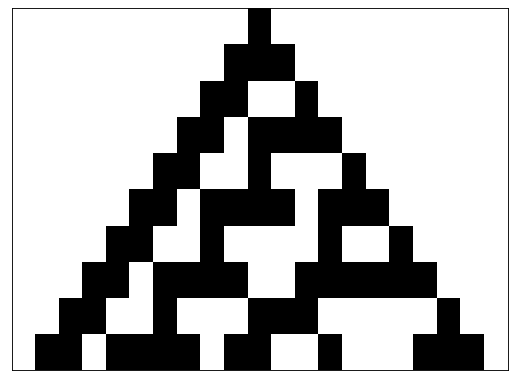

In [77]:
rule = 30
n = 10
ca = CA(rule, n)
ca.start_single()
ca.loop(n-1)
drawer = CADrawer()
drawer.draw(ca)
drawer.show()

<div class="alert alert-info">
**Ejercicio:** Escribe un método que genere las 255 reglas y las muestre en una gráfica (con _subplots_, obviamente).
</div>

<div class="alert alert-info">
**Ejercicio:** La página de la [wikipedia](http://en.wikipedia.org/wiki/Cellular_automaton#Classification) menciona 4 clasificaciones ¿Puedes identificarlos en tu gráfica?
</div>

<div class="alert alert-info">
**Ejercicio:** Escribe una animación interactiva en la cual, reciba la regla, el intervalo del tiempo y con eso la vaya dibujando de manera animada.
</div>

### Ejemplo de solución

In [ ]:
import numpy

def getEvolvedCA(rule, n = 30):
    ca = CA(rule, n)
    ca.start_single()
    ca.loop(n-1)
    return ca.get_array()

class MosaicCADrawer(object):
    
    def __init__(self, time_steps):
        self.rows = 26
        self.cols = 10
        self.time_steps = time_steps
        
        
    def draw(self):
        fig, ax = plt.subplots(self.rows,self.cols, figsize=(100,80), sharey=True)
        for row in range(self.rows):
            for col in range(self.cols):
                rule = row*self.cols + col
                if rule <= 255:
                    ca_universe = getEvolvedCA(rule, self.time_steps)

                    ax[row,col].imshow(-ca_universe)
                    ax[row,col].set_xlabel(rule)
                
                ax[row,col].set_xticks([])
                ax[row,col].set_yticks([])

In [ ]:
ca_drawer = MosaicCADrawer(10)
ca_drawer.draw()